# INFO 2950 Final Project

# League of Legends Gamplay Data Analysis
by Bin Jang (bj225)

---------------

## Table of Contents

- [Introduction](#0.-Introduction) 
- [Data Description](#1.-Data-description)
- [Preregistration Statement](#2.-Preregistration-Statement)
- [Data Analysis](#3.-Data-Analysis)
    - [Non-gameplay Components](#3.1.-Analyzing-Non-gameplay-Components)
    - [In-game Components](#3.2.-In-game-Data-Analysis)
- [Evaluation of Significance](#4.-Evaluation-of-Significance)
- [Interpretation and Conclusions](#5.-Interpretation-and-Conclusions)
- [Data Limitations](#6.-Data-Limitations)
- [Acknowledgements](#7.-Acknowledgements)


---------------

## [0. Introduction](#Table-of-Contents)

I have been playing League of Legends (LoL) for over 10 years now, and I probably have spent 1000+ hours playing the game, but I never had enough motivation to systematically investigate on how to win the game, instead I just relied on my 'feelings' and empirical knowledge for over a thousand hours. In this project, I would like to investigate I want to figure out how one wins the game, and what "winning the game" means in a statistical concept - as in when these numbers are met for number of kills, golds earned, etc, it is very likely that you will win the game.

In the analysis I will divide the bigger question into two parts, investigating on **non-gamplay components** and **in-game components** that contributes to one's LoL rank. Before we move on to the full-scale anaysis, I would like to provide some basic information about the game.

*I'm working on this project alone and I'n not a native English speaker. There could be some grammer errors in the notebook.*

### Game System

Summoner - 
Every LoL players are refered to as "summoners" in the game. That's the term that they use in the developer API, too.

#### Matches

<img src="https://mobalytics.gg/wp-content/uploads/2018/09/Champ-select-1.jpg" width="600px" align="center">

LoL is a real-time 5v5 online game. There are 5 players on each game, and the goal of each team is to break the opponent team's "nexus" (which is a building) which makes the whole team win. All summoners get to choose their own characters (called "champions" in the game) and starting positions on the map (called "lanes"). The idea in my project is to find out whether the elements on each game that are non-skill-related -- such as the starting "lane", or the matchmaking algorithm or whatever.

#### Ranks and Tiers 

<img src="https://am-a.akamaihd.net/image?f=https://news-a.akamaihd.net/public/images/articles/2019/january/ranked2019/Lineup.jpg&resize=640:" width="600px">

All summoners in LoL are divided into 9 divisions -- Challenger, Grandmaster, Master, Diamond, Platinum, Gold, Silver, Bronze, and Iron -- according to their rankings (right to left on the image). Players of rankings 1 ~ 300 are placed in the Challenger tier; those of rank 301 ~ 700 are placed in Grandmaster tier; from Master tier, the logic gets more complicated because it is not based on rankings and something else, but if we talk about it in terms of percentages, it's about the top 0.07% (around 2000 in rank). Diamond tier is around the top 1.28% (around 40,000 in rank). These are all based on KR server statistics, and although the exact numbers will change over time, we will assume that it stays about the same. The gameplay data that we will use in this project is up to Master tier.

### The Map

<img src="https://mobalytics.gg/wp-content/uploads/2018/12/Basic-map.jpg" width="600px">

There are two teams of five players: the blue team (base at bottom left corner) and the red team (base at the top right corner).

<img src="https://mobalytics.gg/wp-content/uploads/2019/06/Nexus-and-turrets.jpg" width="600px">

To achieve victory, one team has to destroy the opposing team’s Nexus (basically the core of their base).

<img src="https://mobalytics.gg/wp-content/uploads/2019/06/Minimap.jpg" width="400px">

<img src="https://cdn1.dotesports.com/wp-content/uploads/2018/11/14124235/turretplating1.jpg" width="400px">

But you just can't go straight to the nexus and win the game; in each lanes, there are 3 outer turrets and an inhibitor that protect the nexus.
Since turrets have a lot of health, you have to get gold, buy items, and get stronger. You can get gold by killing an opponent player, assisting a kill, taking down a turret, or killing a monster. The first kill on the whole game gives you a little bit more gold. 

### Objectives and Monsters


#### Dragon (Elemental dragon)
<img src="https://mobalytics.gg/wp-content/uploads/2019/06/Dragon.jpg" width="600px">

Killing an elemental dragon won’t help you win instantly but can make the game easier for you and your teammates over time. Killing a dragon grants buff to the whole team throughout the entire game. The dragons are quite powerful in the early to mid game so they will often require multiple team members to slay, especially if the other team is looking to contest it. The opponent team could also "steal" the dragon by giving it the killing blow.



#### Baron Nasher
<img src="https://mobalytics.gg/wp-content/uploads/2019/06/Team-Baron.jpg" width="600px">

Baron is the most powerful monster in Summoner’s Rift so you’ll need multiple team members to slay it unless a match goes on for a very long time (eventually few or even one champion may be able to slay it on their own).

Since Baron is so strong, teams can often win by killing a team that’s low on health because they tried to take it at a bad time. It can often be the site of a “final battle” at the end of a close game as the winning team can use it to get a big enough lead to secure a victory. Slaying Baron grants a buff, called Hand of Baron, that is given to all living members of the team that slayed the Baron. 

(Many of the explanations here were taken from [this website](https://mobalytics.gg/blog/absolute-beginners-guide-to-league-of-legends/).)

------------------

## [1. Data description](#Table-of-Contents)

In this project, I use two different datasets for each part of the analysis. Because the datasets were too big to be uploaded onto CMS, I uploaded them onto [Cornell Box](https://cornell.box.com/s/h1h5n2cb7ho3dorobvrypi1a2s74p1yt). 

### Dataset for the First Part of Anlysis 
On the first part of the analysis where I analyze how off-game components affect one's rank, I used datasets that I collected myself using the [Riot Games Developer API](https://developer.riotgames.com). Not much preprocessing was done to the dataset other than removing some columns that are irrelevant to my analysis. There are no other people involved in the collection of data and I didn't get any money for it.

For the dataset that I use for analysis 1.1, where I analyze the relationship between the number of games one played and his rank, the final dataframes(one for each tier- Challenger, Grandmaster, Master, in descending order) contain four columns each, namely 'summonerId', 'leaguePoints', 'wins', and 'losses'. 
- 'summonerId' is the unique summoner ID that Riot gives to each summoner.
- 'leaguePoints' is the amount of league points that a summoner has. More LP means higher rank, and there is no upper limit for the amount of LP that you can have. If you win a game, you gain LP; if you lose a game, you lose LP. Simple as that. As of April 26th 2021, the #1 ranked player has 1,522LP.
- 'wins' and 'losses' are the number of wins and losses. There's no draw in LoL, so wins + losses would be the total number of games played

For the dataset that I use for analysis 1.2, I counted the number of unique champions used for the recent 10 games. The columns display the following information:
- summonerId: unique summoner id
- accountId: unique account id (used for API requests)
- leaguePoints: LP
- nChamps: number of unique champions played in recent 20 matches

### Dataset for the Second Part of Anlysis 
On the second part of the analysis where I analyze the in-game components of the games, I used [Kaggle datasets](https://bit.ly/3cPWsM2) that collected the in-game statistics of about 200,000 games played in April 2020. These are also collected using the Riot Games Developer API, but since there is a limit in which a user can make requests in a week, I used a pre-collected dataset instead of collecting them myself (because I had to make so many in order to create a big dataset.) I believe that this project was collected for personal purposes, not something that multiple people are involved in or funded by. 

There are 50 columns in each of these pre-collected datasets; however, some of the boolean and integer columns contain redundant information. 

For example, col 2 "blueWins" (bool-like integer, 1 if the blue team won) and col 26 "redWins" (1 if the red team won) display the same information just negated (1, 0), and so are redFirstBlood (first player kill on the game), redFirstTower, etc. 

Same for some of the integer columns, like blueTotalLevel and blueAverageLevel (because average level is just total level divided by 5, the number of players on each team).

Disregarding redundant columns, the columns display the following information:
- gameId: Unique ID of the game (integer), just like summonerId
- gameDuration: Integer, duration of the game in seconds
- blueWins: Boolean, 1 if the blue team won the game
- blueFirstBlood: Boolean, 1 if the blue team got the first blood (first kill of the whole game, which gives more gold)
- blueFirstTower: Boolean, 1 if the blue team got the first tower (also gives more gold)
- blueFirstBaron: Boolean, 1 if the blue team got the first Baron (does not give more gold)
- blueFirstDragon: Boolean, 1 if the blue team got the first dragon (does not give more gold)
- blueFirstInhibitor: Boolean, 1 if the blue team got the first inhibitor (does not give more gold)
- blueDragonKills: Integer, number of dragons killed by the blue team
- blueBaronKills: Integer, number of Barons killed by the blue team
- blueTowerKills: Integer, number of towers taken down by the blue team (max 11, because towers don't respawn)
- blueInhibitorKills: Integer, number of Inhibitors taken down by the blue team (inhibitors do respawn)
- blueWardkills: Integer, number of enemy wards removed by the blue team (wards are items that light up the map on the enemy side)
- blueKills: Integer, number of enemy champion kills by the blue team
- blueDeath: Integer, number of deaths on blue team
- blueAssist: Integer, total number of assists on blue team (when you aid a kill)
- blueChampionDamageDealt: Long, total damage dealt by the blue team on enemy champions
- blueTotalGold: Integer, total gold gained by the blue team
- blueTotalMinionKills: Integer, total number of minions killed by the blue team
- blueTotalLevel: Integer, sum of levels of players on the blue team (max 18*5=90)
- blueAverageLevel: Float, total level divided by 5
- blueJungleMinionKills: Integer, total number of jungle monsters killed by blue team
- blueKillingSpree: Integer, number of killing sprees on blue team (3+ consecutive kills without dying, individually)
- blueTotalHeal: Long, total amount of health healed for the blue team
- blueObjectDamageDealt: Long, total amount of damage dealt on objects (buildings like turrets and inhibitors, nexus) by the blue team

The list continues for the red team, but the blue(Boolean) and red(Boolean) contains redundant information reversed. So does 'Kills" and "Death"s. Therefore when we remove the overlapping columns and the gameId column (because it is just for identification), we have **39** unique columns. When the columns are redundant, I kept the columns that come first in order. 

------------------

## [2. Preregistration Statement](#Table-of-Contents)

In the project as a whole, I want to figure out how one wins the game, and what "winning the game" means in a statistical concept - as in when these numbers are met for number of kills, golds earned, etc, it is very likely that you will win the game.

In the analyses, I will divide this bigger question into two parts: 

### First analysis: Analyzing the non-gameplay components that contribute to higher rankings

In the first analysis, I will analyze the component of the game that doesn't directly relate to one's gameplay. For example, the number of games that one plays; if you play more games, does that necessarily mean that you'll get better at it? Are players with more number of games higher up in rank? I will make a scatterplot of 'number of games vs. league points (if you're higher in league points, you're higher up in rank.)' to see if I see a trend between the two.

Another example of a non-gameplay component that contributes to higher rank could be one's 'champ pool' - the number of champions that one is able to play in ranked matches. This has been a controvery among players; do you need to play all of the 154 champions in the game to increase your chance of winning? Or is better to play games with one or two champions that you play best? I will also make this analysis by making a plot between the number of 'unique' champions played in the last 100 games (not sure about the exact number of games yet, because of the limitation in the computing power that I have) and league point (ranking).

### Second Analysis: Analyzing in-game components that contributes to winning 'a' game

Since league of legends is a 5 v 5 game and your teammates are often times people you've never met before, there are a lot of disagreements in the game about what to do as a team. Just like any other sports, there often exist unexpected losses or wins in the game that happens out of the blue. Strategy is a big part of this game; there are many ways to win the game, but what is the one that **you** should choose?

Using the [pre-collected Kaggle dataset](https://bit.ly/3cPWsM2) that analyzes the in-game statistics of about 200,000 games played in 2020, I hope to make a 'winning strategy', by analyzing relationship between the 25 variables in the dataset and the outcome of the game. Among those 25 variables - which includes statistics like the number of kills, number of damage dealt, the gold that you've earned, etc - which ones are contribute to winning the game? I expect to make a logistic regression model that would predict the outcome of the game. The first part of the analysis would be identifying the important factors among the 25, and the second part would be to build a predictive model out of those important factors and calculate one's chance of winning when those conditions are met, using some test set. 

------------------

## [3. Data Analysis](#Table-of-Contents)

### 3.1. Analyzing Non-gameplay Components

I will first analyze the non-gameplay components that could potentionally affect one's ranking; number of games and the 'champ pool' (the number of champions that one plays in ranked matches).

#### 3.1.1. Number of games

In [1]:
# Do all the necessary imports and read_csv's
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

chal_df = pd.read_csv('challenger_data.csv')
gm_df = pd.read_csv('grandmaster_data.csv')
m_df = pd.read_csv('master_data.csv')

Now, we will plot "League points" against the number of games for each user in a scatterplot so that we can see the correlation between the two variables; we will do it first for all the challenger users.

Text(-2.700000000000003, 0.5, 'League Points')

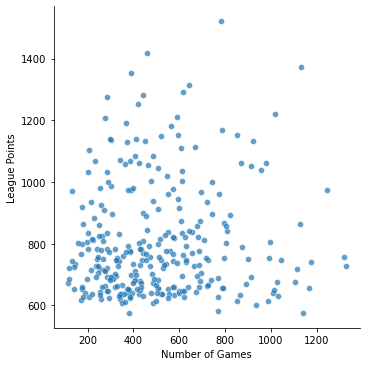

In [2]:
chal_df["numGames"] = chal_df["wins"] + chal_df["losses"]
sns.relplot(x = "numGames", y = "leaguePoints", data = chal_df, alpha = 0.7)
plt.xlabel("Number of Games")
plt.ylabel("League Points")

In [7]:
chal_df.corr().loc['numGames', 'leaguePoints']

0.0707532507877987

It seems like the distribution is totally random, as the graph does not display any relation and the correlation coefficient is also very low. Let us be more specific then; is the **number of wins** related to rankings by any chance?

Text(-2.700000000000003, 0.5, 'League Points')

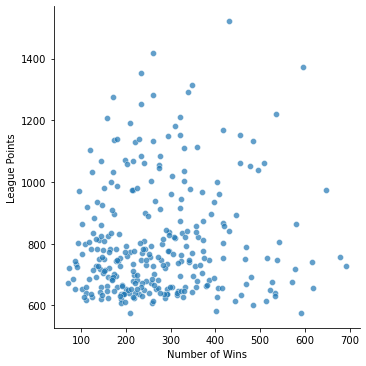

In [10]:
sns.relplot(x = "wins", y = "leaguePoints", data = chal_df, alpha = 0.7)
plt.xlabel("Number of Wins")
plt.ylabel("League Points")

In [11]:
chal_df.corr().loc['wins', 'leaguePoints']

0.09764573079541831

The number of wins and the ranking is not related to each other either. In fact, this was true for all the users above Master tier. This is a scatterplot that inclues all the 2000 users above Master tier (i.e. includes Chal and GM). 

Text(-2.700000000000003, 0.5, 'League Points')

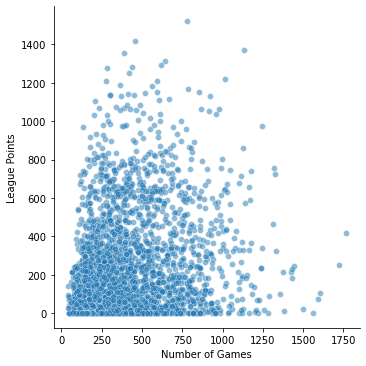

In [12]:
gm_df["numGames"] = gm_df["wins"] + gm_df["losses"]
m_df["numGames"] = m_df["wins"] + m_df["losses"]
all_users = pd.concat([chal_df, gm_df, m_df])

sns.relplot(x = "numGames", y = "leaguePoints", data = all_users, alpha = 0.5)
plt.xlabel("Number of Games")
plt.ylabel("League Points")

Text(-2.700000000000003, 0.5, 'League Points')

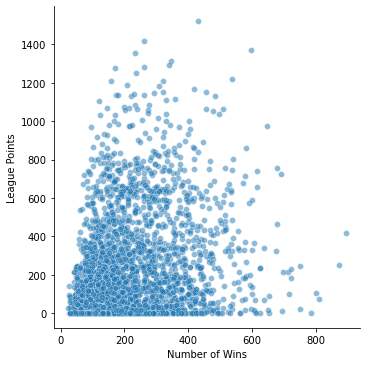

In [13]:
sns.relplot(x = "wins", y = "leaguePoints", data = all_users, alpha = 0.5)
plt.xlabel("Number of Wins")
plt.ylabel("League Points")

In [16]:
all_users.corr().loc['leaguePoints', ['wins', 'losses', 'numGames']]

wins        0.224708
losses      0.174152
numGames    0.199977
Name: leaguePoints, dtype: float64

Although it is a bit hard to see from the graph because there are too many datapoints, from the correlation coefficients we can tell that at least in the tiers above Master, the number of games or the number of wins do not affect the league points; that is, playing the game more doesn't guranetee that you'll place higher in rankings. Although the coefficients were increased compared to the challenger-only analysis, I believe that that is due to the increased sample size, because the correlation coefficients for the 'losses' column is also higher, which cannot logically be true.

Text(-2.700000000000003, 0.5, 'League Points')

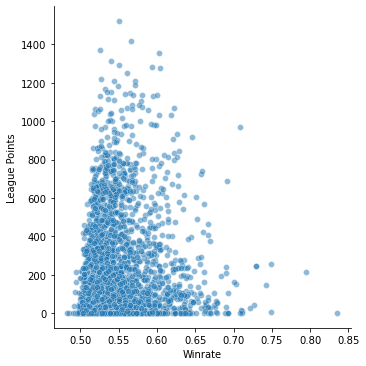

In [17]:
all_users['winrate'] = all_users['wins'] / all_users['numGames']
sns.relplot(x = "winrate", y = "leaguePoints", data = all_users, alpha = 0.5)
plt.xlabel("Winrate")
plt.ylabel("League Points")

Interestingly, the winrate was not related to one's ranking, either. The #1 ranked player had a winrate of around 55% percent, and there were players with extremely high winrate of more than 75% who were low in league points. It's probably because they didn't play enough number of games to gain as much points.

Although we now know that playing more doesn't help us get better, can we learn anything interesting from the distribution in gerneral?

In [18]:
all_users.describe()

,leaguePoints,wins,losses,nChamps,numGames,winrate
count,2715.000000,2715.000000,2715.000000,989.000000,2715.000000,2715.000000
mean,233.648987,218.720810,191.722284,7.475228,410.443094,0.547268
std,259.899108,132.647921,130.843095,3.149552,262.998563,0.039540
min,0.000000,22.000000,12.000000,1.000000,38.000000,0.482927
25%,34.000000,115.000000,90.000000,5.000000,207.000000,0.519481
50%,137.000000,191.000000,162.000000,8.000000,352.000000,0.536000
75%,343.000000,292.000000,259.500000,10.000000,553.000000,0.563132
max,1522.000000,894.000000,870.000000,17.000000,1764.000000,0.835052


What I found intersting here is that although the LP of #1 player is a whopping 1,522, the mean is only around 234. The 75th percentile is still on 343 points. That means that **a few of the high-ranked players are monopolizing over the majority of the league points**. That is, it will be much harder to climb from rank 200 to 100 than to climb from, say rank 2000 to 1900. **You'll need to win a lot more games to climb in the top ranks**. 

#### 3.1.2: The 'Champ Pool'

Now we will analyze the relationship between a user's 'champ pool' and his rankings. To do this, I added a 'nchamps' column to each of the dataframe that counts how many unique champions were played in the last 20 ranked matches that the user played. As we did for the previous sections, we will first plot this variable against 'league points'.

Text(-2.700000000000003, 0.5, 'League Points')

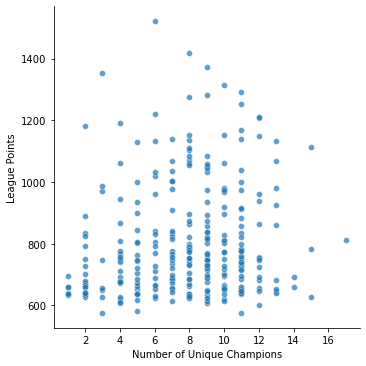

In [19]:
sns.relplot(x = "nChamps", y = "leaguePoints", data = chal_df, alpha = 0.7)
plt.xlabel("Number of Unique Champions")
plt.ylabel("League Points")

At first glance the two look unrelated. Since the graph is a bit hard to read, instead of plotting all the individual players, I will take the mean of league points for players who belong in the same 'nchamps' category.

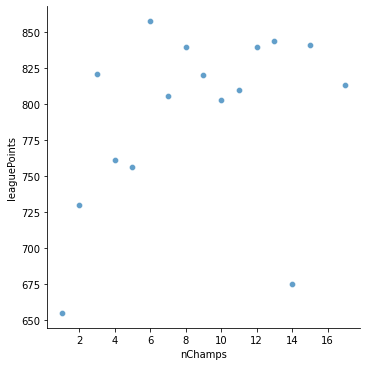

In [20]:
dicts = {}
for i in range(21):
    dicts[i] = chal_df[chal_df['nChamps'] == i].mean()
    
chal_mean = pd.DataFrame(dicts).T
sns.relplot(x = "nChamps", y = "leaguePoints", data = chal_mean, alpha = 0.7)

<AxesSubplot:xlabel='nChamps', ylabel='leaguePoints'>

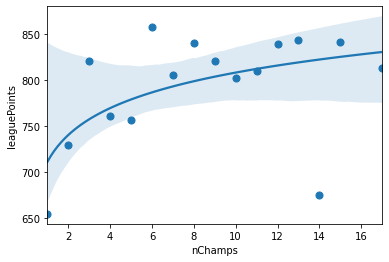

In [127]:
sns.regplot(x = "nChamps", y = "leaguePoints", data=chal_mean, x_estimator=np.mean, logx=True)

When we plotted the mean values instead, the plot looks approximately logarithmic, although there are a few outliers. Let us see if the model works in the bigger dataset, including all the players up to Grandmaster tier.

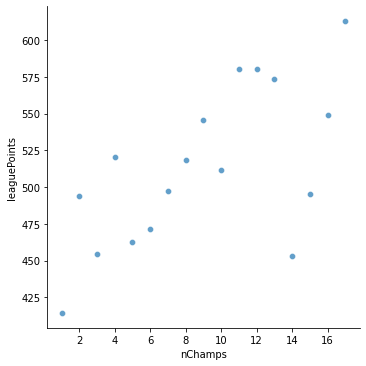

In [21]:
all_df = pd.concat([chal_df, gm_df])
all_df['winrate'] = all_df['wins'] / all_df['numGames']
dicts2 = {}
for i in range(21):
    dicts2[i] = all_df[all_df['nChamps'] == i].mean()
    
all_mean = pd.DataFrame(dicts2).T
sns.relplot(x = "nChamps", y = "leaguePoints", data = all_mean, alpha = 0.7)

<AxesSubplot:xlabel='nChamps', ylabel='leaguePoints'>

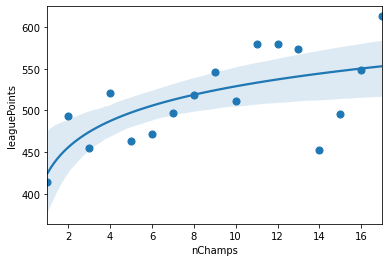

In [22]:
sns.regplot(x = "nChamps", y = "leaguePoints", data=all_mean, x_estimator=np.mean, logx=True)

Although the trend looks less 'logarithmic' when we extend our sample, we know for sure that there is a positive trend between the number of champions and one's ranking. Let's look at the actual distribution instead of the mean to strengthen our hypothesis.

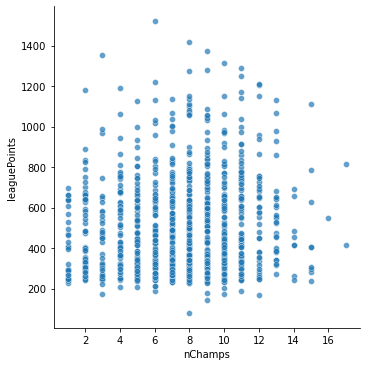

In [23]:
sns.relplot(x = "nChamps", y = "leaguePoints", data = all_df, alpha = 0.7)

In [24]:
all_df.describe()

,leaguePoints,wins,losses,nChamps,numGames,winrate
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,511.218402,256.550051,222.459050,7.475228,479.009100,0.547829
std,235.396760,132.304538,131.542244,3.149552,263.447732,0.033347
min,78.000000,49.000000,32.000000,1.000000,87.000000,0.502110
25%,324.000000,153.000000,123.000000,5.000000,279.000000,0.523929
50%,454.000000,232.000000,193.000000,8.000000,425.000000,0.539474
75%,648.000000,333.000000,297.000000,10.000000,629.000000,0.562674
max,1522.000000,894.000000,870.000000,17.000000,1764.000000,0.748387


It seems like there are less players towards both the right and the left end, but the overall distribution leans slightly towards the left. Out of 989 players, there was **no player who played 20 different champions on the past 20 games (17 was max)**, the **mean was around 8**, and **around half of the players played 5 to 10 unique champions**. If we look at that at a bigger context, since there are **155** different champions in League of Legends, over half of the high-ranked players play with only around **3.2 ~ 6.5 % of the available champion choices** (especially because there was none above 17 anyways).

In [25]:
onechamp = all_df[all_df['nChamps'] == 1]
onechamp.describe()

,leaguePoints,wins,losses,nChamps,numGames,winrate
count,30.00000,30.000000,30.000000,30.0,30.000000,30.000000
mean,414.30000,210.100000,181.100000,1.0,391.200000,0.548685
std,161.29458,107.051824,107.531022,0.0,214.357645,0.035276
min,225.00000,74.000000,37.000000,1.0,111.000000,0.507859
25%,266.50000,144.250000,118.500000,1.0,261.250000,0.527944
50%,402.00000,178.500000,153.500000,1.0,331.500000,0.540062
75%,557.00000,258.250000,231.750000,1.0,490.750000,0.547861
max,695.00000,517.000000,501.000000,1.0,1018.000000,0.666667


Also there were **30 players** (about 3% of the whole population) who played only **one champion** for the past 20 games. This group had a slightly lower league point average compared to the whole population, but also less number of games, and **around the same winrate**. This shows that you can still enjoy the game even if you only know how to play a single champion.

In [26]:
highLP = all_df[all_df['leaguePoints'] > 1000]
highLP.describe()

,leaguePoints,wins,losses,nChamps,numGames,winrate
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1147.630435,299.260870,244.934783,8.434783,544.195652,0.559793
std,116.927966,117.816512,119.213050,2.705157,236.705877,0.027656
min,1002.000000,120.000000,77.000000,2.000000,202.000000,0.517745
25%,1062.000000,217.000000,158.500000,7.000000,373.750000,0.538983
50%,1130.500000,273.500000,214.500000,8.000000,480.500000,0.556498
75%,1203.000000,345.000000,293.250000,10.000000,636.250000,0.578871
max,1522.000000,596.000000,537.000000,15.000000,1133.000000,0.622318


Now let's look at the statistics of the top-ranked players with over 1000 LP. First thing we notice is that the mean number of games and winrate are both higher than the total average. Also, nChamps is higher, so they have more options of champions to choose from.

In conclusion, what we know from the first part of the analysis is that **neither high winrate nor more number of games alone guarentees higher rank; you need a good mix of both**. As for the number of champions, **there is a positive trend and the mean goes up as the rank gets higher, but there are outliers, so it's not necessary to play diverse champions but statistically advantageous to do so.** 

------------------

### 3.2. In-game Data Analysis

In [27]:
# Reading pre-collected csv files / separate file for each tier

C_data = pd.read_csv("Challenger_Ranked_Games.csv")
GM_data = pd.read_csv("GrandMaster_Ranked_Games.csv")
M_data = pd.read_csv("Master_Ranked_Games.csv")

C_data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


#### 3.2.1: "First" Columns

Columns 3~8 display which team took the first objective (Kill, tower, Baron, Dragon, Inhibitor).
I plotted the correlation between the "win" and "first" variables to see the correlations between the individual "first" columns and the win/loss of the game.

In [28]:
# Only the boolean data
C_booldata = C_data.iloc[:,2:8]
C_booldata.corr()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor
blueWins,1.000000,0.206442,0.449065,0.366722,0.267778,0.637521
blueFirstBlood,0.206442,1.000000,0.209255,0.057685,0.133711,0.146766
blueFirstTower,0.449065,0.209255,1.000000,0.134875,0.195663,0.344918
blueFirstBaron,0.366722,0.057685,0.134875,1.000000,0.116563,0.424044
blueFirstDragon,0.267778,0.133711,0.195663,0.116563,1.000000,0.163540
blueFirstInhibitor,0.637521,0.146766,0.344918,0.424044,0.163540,1.000000


If we take a look at the first row/column of the correlation matrix, we can notice that all five of the "First" variables have a positive correlation with the outcome of the game; that is, if you get the first kill/tower/baron etc, it is likely that it would positively affect the outcome of the game. Some of the "First" variables seem to be stronger than others, namely "FirstTower" and "FirstInhibitor". If we compute the probobabilty that the team will win the game when they take down the first tower or the inhibitor,

In [29]:
C_booldata[C_booldata["blueFirstTower"] == 1].describe().round(4)*100

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor
count,1414100.00,1414100.00,1414100.0,1414100.00,1414100.00,1414100.00
mean,71.34,60.29,100.0,29.91,49.76,52.51
std,45.22,48.93,0.0,45.79,50.00,49.94
min,0.00,0.00,100.0,0.00,0.00,0.00
25%,0.00,0.00,100.0,0.00,0.00,0.00
50%,100.00,100.00,100.0,0.00,0.00,100.00
75%,100.00,100.00,100.0,100.00,100.00,100.00
max,100.00,100.00,100.0,100.00,100.00,100.00


In [30]:
C_booldata[C_booldata["blueFirstInhibitor"] == 1].describe().round(4)*100

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor
count,987700.00,987700.00,987700.00,987700.00,987700.00,987700.0
mean,91.86,59.99,75.17,48.32,51.18,100.0
std,27.35,48.99,43.20,49.97,49.99,0.0
min,0.00,0.00,0.00,0.00,0.00,100.0
25%,100.00,0.00,100.00,0.00,0.00,100.0
50%,100.00,100.00,100.00,0.00,100.00,100.0
75%,100.00,100.00,100.00,100.00,100.00,100.0
max,100.00,100.00,100.00,100.00,100.00,100.0


This result is very intesting.
First off, when a team takes down the first tower, their probability to win the game is around **71.34%**; when they take the first inhibitor, it is **91.86%** -- which means that they probably won the game already. 

What's far more intersting is the correlation between "*FirstTower*" and "*FirstInhibitor*"; When a team takes the first tower down, **the probability that they will also take down the first inhibitor is 52.51%**, so we can say that taking the first tower down doesn't affect the probability to take the first inhibitor. However, **75.17% of the team that took the first inhibitor down also previously took the first tower down.**

This is something deeper, but against the common belief, taking the first tower down had little correlation with getting the first dragon; this might be caused because challenger tier players get their first dragon before taking the tower town.

We then take a look at the data from lower tier games.

In [31]:
# Same operations for different tiers
GM_booldata = GM_data.iloc[:,2:8]
M_booldata = M_data.iloc[:,2:8]

GM_booldata.corr()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor
blueWins,1.000000,0.202711,0.459949,0.361664,0.264384,0.650728
blueFirstBlood,0.202711,1.000000,0.212475,0.056349,0.140685,0.153840
blueFirstTower,0.459949,0.212475,1.000000,0.138477,0.204402,0.377750
blueFirstBaron,0.361664,0.056349,0.138477,1.000000,0.130357,0.400443
blueFirstDragon,0.264384,0.140685,0.204402,0.130357,1.000000,0.166439
blueFirstInhibitor,0.650728,0.153840,0.377750,0.400443,0.166439,1.000000


In [32]:
M_booldata.corr()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor
blueWins,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425
blueFirstBlood,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705
blueFirstTower,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007
blueFirstBaron,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164
blueFirstDragon,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230
blueFirstInhibitor,0.668425,0.157705,0.397007,0.410164,0.186230,1.000000


Shape of the correlation matrices look approximately the same. Now if we compare the FirstTower and FirstInhibitor statistics:

In [33]:
C_FT = C_booldata[C_booldata["blueFirstTower"] == 1].mean().round(4)*100
C_FI = C_booldata[C_booldata["blueFirstInhibitor"] == 1].mean().round(4)*100

GM_FT = GM_booldata[GM_booldata["blueFirstTower"] == 1].mean().round(4)*100
GM_FI = GM_booldata[GM_booldata["blueFirstInhibitor"] == 1].mean().round(4)*100

M_FT = M_booldata[M_booldata["blueFirstTower"] == 1].mean().round(4)*100
M_FI = M_booldata[M_booldata["blueFirstInhibitor"] == 1].mean().round(4)*100

print("Winrate when first tower down \n")
print("Challenger: ", C_FT[0], "%")
print("Grandmaster: ", GM_FT[0], "%")
print("Master: ", M_FT[0], "%\n")
print("Winrate when first inhib down \n")
print("Challenger: ", C_FI[0], "%")
print("Grandmaster: ", GM_FI[0], "%")
print("Master: ", M_FI[0], "%")

Winrate when first tower down 

Challenger:  71.34 %
Grandmaster:  71.84 %
Master:  72.5 %

Winrate when first inhib down 

Challenger:  91.86 %
Grandmaster:  91.01 %
Master:  91.51 %


It would be better if we had more tiers to compare to, but for now we can say that taking the first tower is less important for higher-tier games, while taking the first inhibitor down is more important.

In conclusion, for games in all three tiers, **taking the first inhibitor down** was the most important factor among the six boolean variables, as **you would win 9 out of 10 games if you take the first inhibitor down**.

#### 3.2.2: Numerical variables

In [34]:
# Numerical data
C_numdata = C_data.iloc[:,9:26]
C_numdata.head()

,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675
1,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303
2,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651
3,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287


On the same dataset, columns 9 ~ 26 and 33 ~ 50 display numerical statistics that are important in the game. Obviously, we can't use all of the 34 features for our model, so let's go through the process of feature selection first.

In [35]:
# Correlation matrix of numerical features
C_numdata['blueWins'] = C_data['blueWins']
C_wins = C_numdata.corr()[17:18]
C_wins.sort_values('blueWins', axis = 1, ascending=False)

,blueWins,blueTowerKills,blueInhibitorKills,blueObjectDamageDealt,blueKills,blueKillingSpree,blueAssist,blueBaronKills,blueTotalGold,blueAvgLevel,blueTotalLevel,blueTotalHeal,blueJungleMinionKills,blueChampionDamageDealt,blueTotalMinionKills,blueWardkills,blueWardPlaced,blueDeath
blueWins,1.0,0.708405,0.554367,0.525094,0.453521,0.420451,0.372974,0.355048,0.276481,0.226127,0.226127,0.215695,0.207726,0.18018,0.078853,0.070485,0.037542,-0.439782


If we look at the correlation matrix, the top three features are related to **'objectives'**, i.e. taking down enemy buildings. Kills come next, gold and level follows. As expected, AvgLevel and TotalLevel contain the exact same information because the average level is simply the total level divided by the number of players. I will select the top 9 features, including up to blueAvgLevel.

But what's also interesting is 'blueDeaths'. Although it has a negative correlation, its magnitude is big, so it contains a lot of information. I will include 'blueDeaths' (which should be equal to redKills in most cases) as our tenth feature.

Because LoL is a competitive game, it is also important that your team plays better relative to the opposing team, not just in an objective manner. So I will try adding two more 'ratio' variables for our correlation matrix, namely goldRatio and levelRatio (information about kills is already contained in 'blueKills' and 'blueDeaths')

In [36]:
# Newly define two relative variables
C_relVar = C_numdata.iloc[:,17:18]
C_relVar['goldRatio'] = C_data['blueTotalGold'] / C_data['redTotalGold']
C_relVar['levelRatio'] = C_data['blueAvgLevel'] / C_data['redAvgLevel']
C_relVar.corr()

<ipython-input-36-14a03fddef9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_relVar['goldRatio'] = C_data['blueTotalGold'] / C_data['redTotalGold']
<ipython-input-36-14a03fddef9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_relVar['levelRatio'] = C_data['blueAvgLevel'] / C_data['redAvgLevel']


,blueWins,goldRatio,levelRatio
blueWins,1.000000,0.828894,0.831375
goldRatio,0.828894,1.000000,0.931396
levelRatio,0.831375,0.931396,1.000000


Thankfully goldRatio and levelRatio are both highly correlated to winning the game. We can substitute those two for blueTotalGold and blueAvgLevel. Now let's try fitting a ten-variable logistic regression model for our problem.

In [38]:
from sklearn.linear_model import LinearRegression

# Correlation matrix including the new variables
C_numdata['goldRatio'] = C_relVar['goldRatio']
C_numdata['levelRatio'] = C_relVar['levelRatio']
C_wins = C_numdata.corr()[17:18]
C_wins.abs().sort_values('blueWins', axis = 1, ascending=False)

,blueWins,levelRatio,goldRatio,blueTowerKills,blueInhibitorKills,blueObjectDamageDealt,blueKills,blueDeath,blueKillingSpree,blueAssist,blueBaronKills,blueTotalGold,blueAvgLevel,blueTotalLevel,blueTotalHeal,blueJungleMinionKills,blueChampionDamageDealt,blueTotalMinionKills,blueWardkills,blueWardPlaced
blueWins,1.0,0.831375,0.828894,0.708405,0.554367,0.525094,0.453521,0.439782,0.420451,0.372974,0.355048,0.276481,0.226127,0.226127,0.215695,0.207726,0.18018,0.078853,0.070485,0.037542


r^2 of 1 variable LRM model:  0.9648
r^2 of 2 variable LRM model:  0.9825
r^2 of 3 variable LRM model:  0.9833
r^2 of 4 variable LRM model:  0.9845
r^2 of 5 variable LRM model:  0.827
r^2 of 6 variable LRM model:  0.8317
r^2 of 7 variable LRM model:  0.9573
r^2 of 8 variable LRM model:  0.9572
r^2 of 9 variable LRM model:  0.9577
r^2 of 10 variable LRM model:  0.9579


/Users/binjang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='nFeatures', ylabel='r2'>

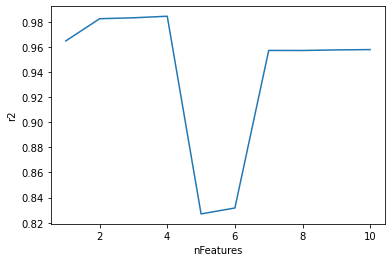

In [46]:
from sklearn.linear_model import LogisticRegression

# Make a list of features, from high correlation to low
fList = ["levelRatio", "goldRatio", "blueTowerKills", "blueInhibitorKills", "blueObjectDamageDealt", "blueKills", "blueDeath", "blueKillingSpree", "blueAssist", "blueBaronKills"]
r2list = []

# Using a for loop, see how much information is added with more features
for i in range(1, len(fList) + 1):
    X = C_numdata.loc[:, fList[:i]]
    lrm = LogisticRegression().fit(X, C_numdata["blueWins"])
    r2score = lrm.score(X, C_numdata["blueWins"])
    r2list.append(r2score)
    print("r^2 of", i, "variable LRM model: ", r2score.round(4))

r2dic = {'r2' : r2list , 'nFeatures' : range(1, 11)}
r2df = pd.DataFrame(r2dic)
sns.lineplot(x = "nFeatures", y = "r2", data = r2df)

Because some of the features are negatively affecting the model, we choose only the features that lead to maximized r^2 value:

r^2 of 1 variable LRM model:  0.9648
r^2 of 2 variable LRM model:  0.9825
r^2 of 3 variable LRM model:  0.9833
r^2 of 4 variable LRM model:  0.9845


<AxesSubplot:xlabel='nFeatures', ylabel='r2'>

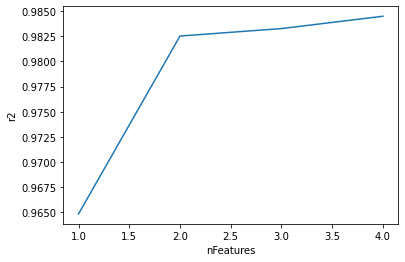

In [43]:
fList = ["levelRatio", "goldRatio", "blueTowerKills", "blueInhibitorKills"]
r2list = []
for i in range(1, len(fList) + 1):
    X = C_numdata.loc[:, fList[:i]]
    lrm = LogisticRegression().fit(X, C_numdata["blueWins"])
    r2score = lrm.score(X, C_numdata["blueWins"])
    r2list.append(r2score)
    print("r^2 of", i, "variable LRM model: ", r2score.round(4))

r2dic = {'r2' : r2list , 'nFeatures' : range(1, 5)}
r2df = pd.DataFrame(r2dic)
sns.lineplot(x = "nFeatures", y = "r2", data = r2df)

Our final model with four features have an r^2 score of 0.985. Since this analysis was done only using the Challenger dataset, let us now extend the model to all of the three tiers.

In [60]:
# Data for all tiers
all_data = pd.concat([C_data, GM_data, M_data])
all_numdata = all_data.iloc[:,9:26]
all_numdata['blueWins'] = all_data['blueWins']

all_numdata['goldRatio'] = all_data['blueTotalGold'] / all_data['redTotalGold']
all_numdata['levelRatio'] = all_data['blueAvgLevel'] / all_data['redAvgLevel']

In [61]:
all_numdata.replace(np.inf, np.nan, inplace = True)
all_numdata = all_numdata.dropna(axis = 0)
all_numdata.describe()

,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,blueWins,goldRatio,levelRatio
count,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000,199911.000000
mean,0.297758,4.343533,0.647038,53.439696,19.548199,24.723537,24.714913,40.392675,69506.071802,47930.672324,500.148706,64.718545,12.943709,123.920830,5.691398,24396.681218,37126.502629,0.495921,1.032422,1.006720
std,0.535055,3.377123,0.910143,30.364321,14.672038,13.542038,13.538244,29.143148,37441.502421,16065.970820,177.498295,14.810196,2.962039,65.998771,3.628337,15230.398459,26588.722317,0.499985,0.270072,0.140406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3355.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345486,0.192308
25%,0.000000,1.000000,0.000000,33.000000,8.000000,15.000000,15.000000,20.000000,41611.000000,36542.000000,383.000000,55.000000,11.000000,83.000000,3.000000,13335.000000,13649.000000,0.000000,0.825657,0.901408
50%,0.000000,4.000000,0.000000,53.000000,18.000000,24.000000,24.000000,35.000000,64488.000000,47900.000000,515.000000,66.000000,13.200000,126.000000,5.000000,21329.000000,33125.000000,0.000000,0.993743,1.000000
75%,1.000000,7.000000,1.000000,73.000000,29.000000,33.000000,33.000000,54.000000,90893.000000,58825.000000,623.000000,75.000000,15.000000,169.000000,8.000000,32077.000000,56809.500000,1.000000,1.208715,1.102941
max,4.000000,11.000000,9.000000,230.000000,118.000000,112.000000,117.000000,256.000000,381484.000000,134323.000000,1514.000000,141.000000,28.200000,402.000000,31.000000,261707.000000,167692.000000,1.000000,4.493819,4.125000


r^2 of 1 variable LRM model:  0.9614
r^2 of 2 variable LRM model:  0.981
r^2 of 3 variable LRM model:  0.9825
r^2 of 4 variable LRM model:  0.9835


<AxesSubplot:xlabel='nFeatures', ylabel='r2'>

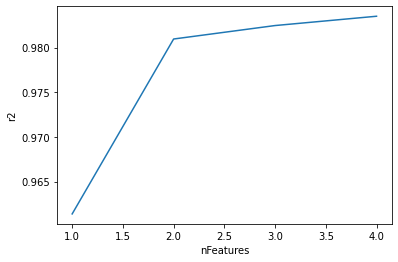

In [62]:
fList = ["levelRatio", "goldRatio", "blueTowerKills", "blueInhibitorKills"]
r2list = []
for i in range(1, len(fList) + 1):
    X = all_numdata.loc[:, fList[:i]]
    lrm = LogisticRegression().fit(X, all_numdata["blueWins"])
    r2score = lrm.score(X, all_numdata["blueWins"])
    r2list.append(r2score)
    print("r^2 of", i, "variable LRM model: ", r2score.round(4))

r2dic = {'r2' : r2list , 'nFeatures' : range(1, 5)}
r2df = pd.DataFrame(r2dic)
sns.lineplot(x = "nFeatures", y = "r2", data = r2df)

It looks like our model is working well with the new dataframe! We will further verify the model in the next section.

------------------

## [4. Evaluation of Significance](#Table-of-Contents)

The aim of our model is to get 50%+ accuracy, which would mean that it would be more accurate than a random guess of win/loss.

We will first use cross-validation within our training set to evaluate our model. Since there are around 200,000 samples which is a large number, we will perform a 10-fold cross-validation. 

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score

# Cross validation
scores = cross_val_score(
    LogisticRegression(), 
    all_numdata[fList], 
    all_numdata["blueWins"], 
    cv=10
)
print(scores)
print(f'Mean score: {scores.mean()}')

[0.98539416 0.98574358 0.98204192 0.98209194 0.98454304 0.98524336
 0.98094142 0.98299235 0.9828923  0.9828923 ]
Mean score: 0.9834776379662964


Confusion matrix
[[98948  1823]
 [ 1476 97664]]


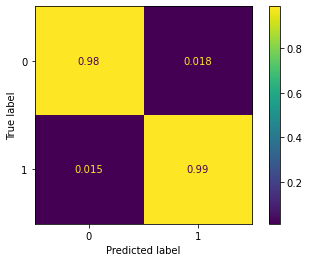

In [69]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# True labels and predicted labels
y_true = all_numdata["blueWins"]
model = LogisticRegression().fit(all_numdata[fList], all_numdata["blueWins"])
y_pred = model.predict(all_numdata[fList])

# Confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_true, y_pred))

# Visualize confusion matrix
plot_confusion_matrix(
    model, 
    all_numdata[fList], 
    y_true, 
    normalize='true'
)
plt.show()

Both the confusion matrix and the cross-validation mean score clearly show that our logistic regression model performs much better than just random guess. 

We will use a new test set to verify this.

------------------

## [5. Interpretation and Conclusions](#Table-of-Contents)

On the first part of the analysis, we looked at the number of games, winrate, and the 'champ pool'. Our conclusion from the first part was that **neither high winrate nor more number of games alone guarentees higher rank.** You need a good mix of both to be high up in the ranking, and the climbing gets harder (requires more LP between ranks) as you get higher in rank. As for the number of champions, there is a positive trend and the mean goes up as the rank gets higher, but there are outliers, so it's not necessary to play diverse champions but statistically advantageous to do so.

On the second part of the anlysis, we dealt with some in-game statistics that were related to the outcome of the game. We first looked at the boolean features, discovering that **taking the first inhibitor is the most influtential thing to do in game**, **taking the first tower down being the next important**. Then we built a **regression model** that predicts the outcome of the game using **four of the most important features from our dataset**, along with newly added features from empirical knowledge, and evaluated its performance with respect to random guessing, using ten-fold cross-validation.

In conclusion, how does one get better at LoL? First, you need to play many games with a decent winrate of 55+%. You don't necessarily have to play many champions, but being able to play about 8 champions should have a positive effect. When you are playing the actual game, focus on leveling, getting as much gold as you can, and taking down turrets above everything else. That is, killing the enemy champion and the KDA (kill/death/assists) is not as meaningful as the gold and level advantages (although they do have some correlation.) This should be pretty much all you have to know to be a high-rank player in League of Legends! (although the actual implementation would be a different matter...)

------------------

## [6. Data Limitations](#Table-of-Contents)

The biggest concern that I have is that this dataset does not reflect the whole LoL population. This data is from the KR server only, and this is the statistic of LoL population by region (ranked players only, i.e. above level 30) as of 03.18.2021 :

In [11]:
LoLpop = pd.read_csv("LoL Population by Region.csv", na_filter = False)
LoLpop

,Region,Region Code,Population rank,Population (Count),Population (%)
0,Korea,KR,1,"3,126,493",29.64%
1,Europe west,EUW,2,"2,189,380",20.76%
2,Europe Nordic & East,EUNE,3,"1,188,536",11.27%
3,North America,NA,4,"1,142,773",10.83%
4,Brazil,BR,5,"1,002,201",9.50%
5,Latin America North,LAN,6,"576,285",5.46%
6,Latin America South,LAS,7,"522,292",4.95%
7,Turkey,TR,8,"465,066",4.41%
8,Russia,RU,9,"144,936",1.37%
9,Oceania,OCE,10,"122,184",1.16%


So this research reflects about 30% of the whole population. Although I believe that the overall trend would be the same across the world, it definitely would make a change if I analyze the whoel population instead of a specific part of it. Since there are 11 servers, I couldn't collect data from all of the servers, but the research has some room for improvement there.

I was also concerned about causality for the second part of the analysis. You don't know if they had more kills / gold / damage because they were already ahead in the game, or if they could win the game because of those factors. I guess the model certainly did the job of setting the hierarchy between those variable, but I believe that the causality problem has to be addressed to make sure that they actually 'contribute' to a win instead of just being the by-product of it. 

Lastly I had technical difficulties while doing the data collection for the first part of the analysis. I had to make thousands of requests on the deloper API to create the dataset, but because there was a rate limit on the number of requests that I could make, it took hours to do the collection. The problem is, these players are real people and they play games while I fetch the data, so their match history and rankings and everything could change *while* I do the data collection. I had to get rid of a few datapoints because of this (because their rankings were 'overlapping' which technically doesn't make sense) and the size of the dataset also had to be limited. I hope I can find a way to get around with this.

------------------

## [7. Acknowledgements](#Table-of-Contents)

- Many of the explanations and photos of the game were taken from [this website](https://mobalytics.gg/blog/absolute-beginners-guide-to-league-of-legends/)
- The dataset used for the second part of the analysis was taken from [Kaggle](https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020/activity)
- And of course, I had to visit the [pandas](https://pandas.pydata.org/docs/index.html) and [seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html) documentation a million times
- Some inspirations from [this LoL match stats website](https://na.op.gg/#)

------------------